# Michele M. Crudele
# 2021858
## 2nd Set of Exercises

## Exercise 1 - Mean and Variance

In [1]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

In [2]:
tap <- data.frame(x, p1, p2)
tap
mean1 <- weighted.mean(tap$x, tap$p1)
mean2 <- weighted.mean(tap$x, tap$p2)
cat("The expected value for the first method is", mean1, "\n")
cat("The expected value for the second method is", mean2, "\n")
cat("The variance of the first method is", sum(tap$x^2*tap$p1)-mean1^2, "\n")
cat("The variance of the second method is", sum(tap$x^2*tap$p2)-mean2^2)

x,p1,p2
15.58,0.15,0.14
15.90,0.21,0.05
16.00,0.35,0.64
16.10,0.15,0.08
16.20,0.14,0.09


The expected value for the first method is 15.959 
The expected value for the second method is 15.9622 
The variance of the first method is 0.033979 
The variance of the second method is 0.02816716

## Exercise 2 - Exponential Distribution

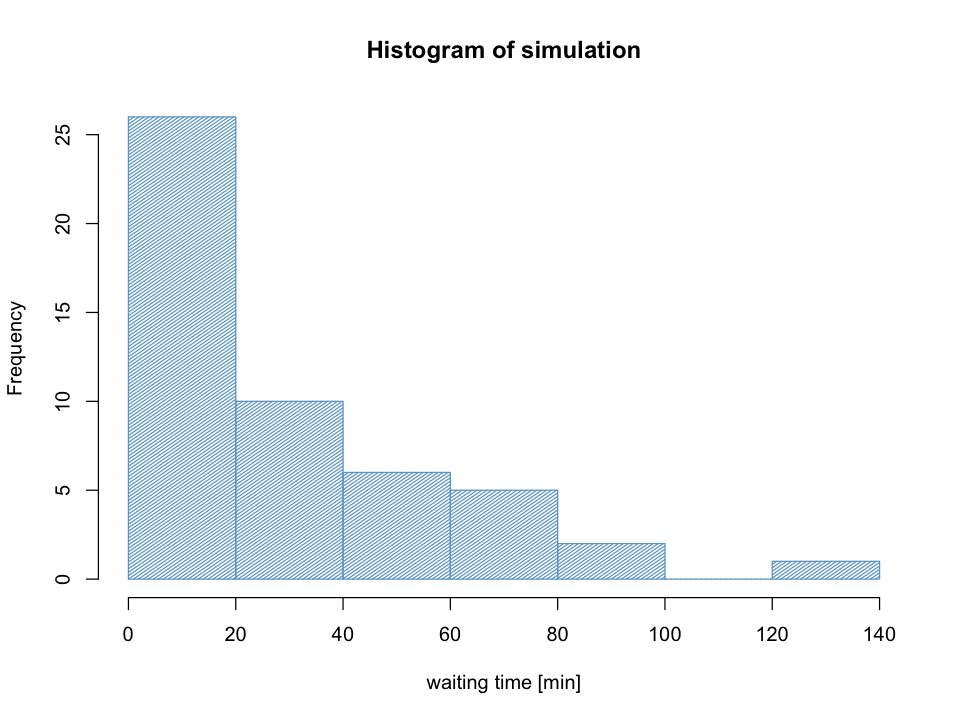

In [3]:
options(repr.plot.width = 8, repr.plot.height = 6)

simulation <- rexp(50, 1/30)
hist(simulation, xlab='waiting time [min]', density=40, col = "skyblue3")

In [4]:
cat("The probability (from simulation) that a person will wait for less than 10 minutes is", 
    length(simulation[simulation < 10]) / length(simulation), "\n")

cat("The probability (from theory) that a person will wait for less than 10 minutes is", 
    pexp(10, 1/30))

The probability (from simulation) that a person will wait for less than 10 minutes is 0.32 
The probability (from theory) that a person will wait for less than 10 minutes is 0.2834687

In [5]:
sprintf("The average waiting time from the simulated data is %.2f: difference from theory (30) = %.2f", mean(simulation), abs(mean(simulation)-30))

[1] "The average waiting time from the simulated data is 29.73: difference from theory (30) = 0.27"

In [9]:
sprintf("The probability (from simulation) for waiting more than 1 hour before being received is %.3f", length(simulation[simulation > 60]) / length(simulation))
sprintf("The probability (from theory) for waiting more than 1 hour before being received is %.3f", 1-pexp(60, 1/30))

[1] "The probability (from simulation) for waiting more than 1 hour before being received is 0.160"

[1] "The probability (from theory) for waiting more than 1 hour before being received is 0.135"

## Exercise 3 - Poisson Distribution

The probability that there is at least one error on a specific page is:
 P(>=1|lambda) =  0.283468689426211 


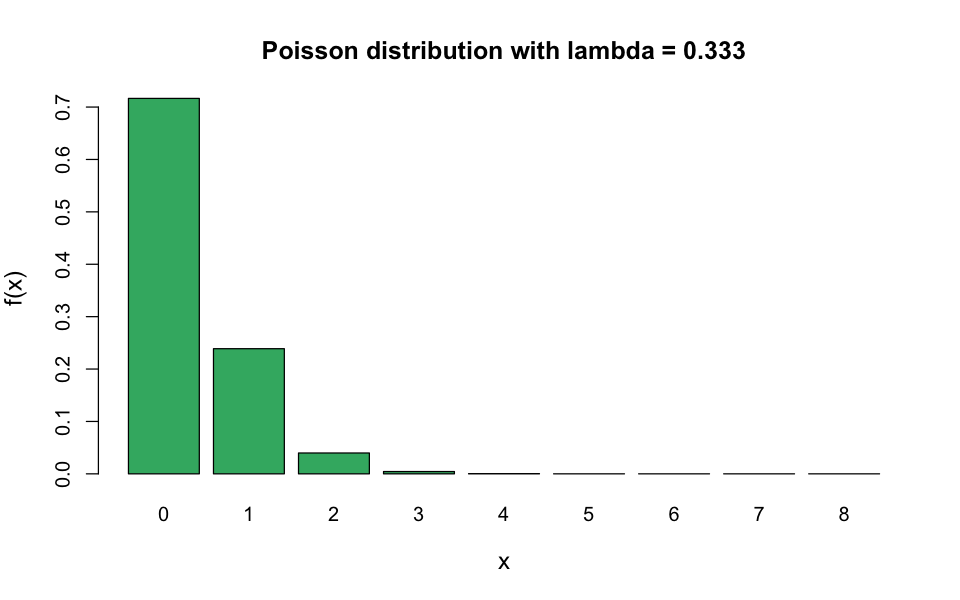

In [7]:
options(repr.plot.width = 8, repr.plot.height = 5)
lambda <- 1/3
x <- 0:8
ap <- dpois(x,lambda)
barplot(ap, names=x, col='mediumseagreen', xlab="x", ylab="f(x)",
    main = sprintf("Poisson distribution with lambda = %.3f",lambda),
    cex.lab=1.2, cex.axis=1, cex.main=1.25)

cat("The probability that there is at least one error on a specific page is:\n", paste(c("P(>=1|lambda) = ", 1 - ap[1],'\n')))

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



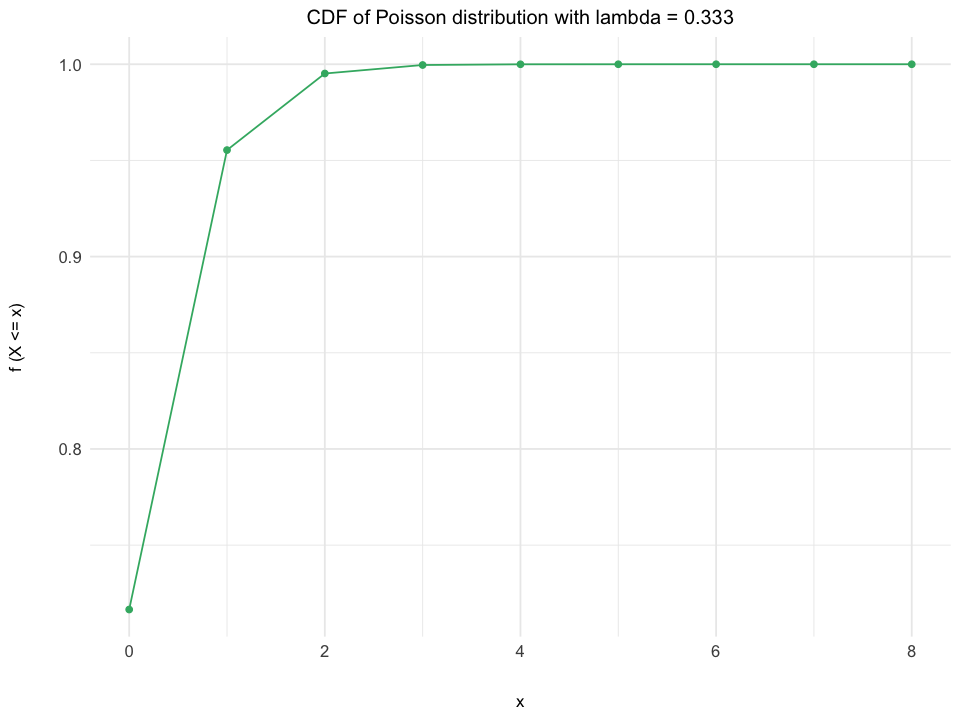

In [10]:
lambda <- 1/3
x <- 0:8
ap <- ppois(x,lambda)
library(ggplot2)
library(dplyr)
ggplot(NULL, aes(x, ap)) +
    geom_line(color="mediumseagreen") +
    geom_point(color="mediumseagreen") +
    theme_minimal() +
    ggtitle(sprintf("CDF of Poisson distribution with lambda = %.3f",lambda)) +
    theme(plot.title = element_text(hjust = 0.5, size=12), axis.text=element_text(size=10), 
          axis.title.x = element_text(size = 10, margin = margin(t = 20, r = 20, b = 0, l = 0)), 
          axis.title.y = element_text(size = 10, margin = margin(t = 0, r = 20, b = 0, l = 0))) +
    labs(y="f (X <= x)", x = "x")

## Exercise 4 - Draw cards from a deck of 52 cards with replacement --> geometric distribution with p = 4/52

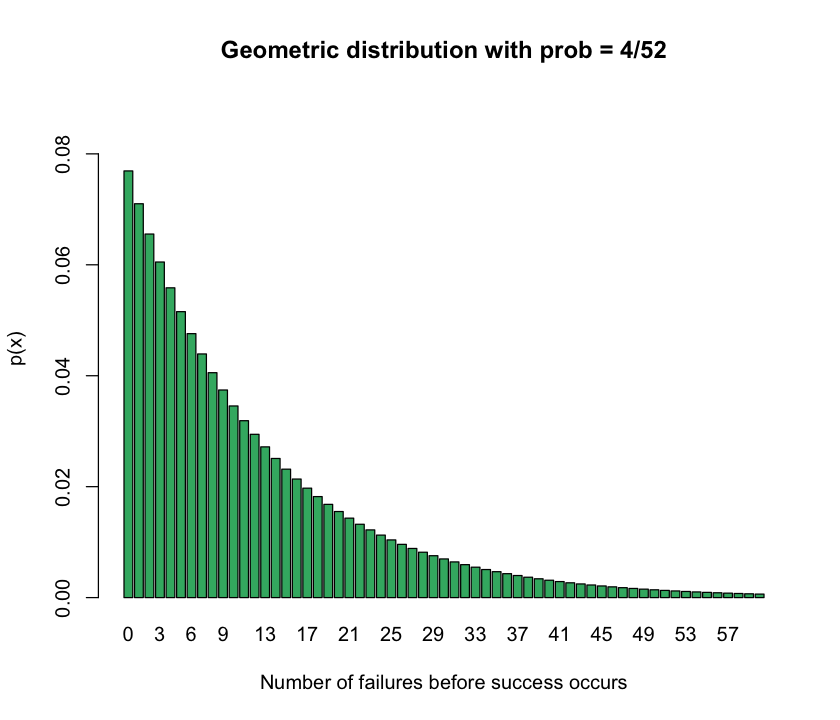

In [9]:
options(repr.plot.width = 7, repr.plot.height = 6)
prob <- 4/52
x <- 0:60
ap <- dgeom(x,prob)
barplot(ap, names=x, col='mediumseagreen',ylim = c(0, 0.09), xlab="Number of failures before success occurs", ylab="p(x)",
    main = sprintf("Geometric distribution with prob = 4/52"))

Calculate the probability that at least 10 draws are needed = at least 9 failures

In [10]:
sprintf("The probability that at least 10 draws are needed is %.4f", 1-pgeom(8, 4/52))

[1] "The probability that at least 10 draws are needed is 0.4866"

## Exercise 5

In [11]:
integral <- integrate(f=function(x) (x-1)*(2-x), lower=1, upper=2)
c <- 1/integral$value
               
cat("c =", c)

c = 6

In [12]:
dtolc <- function(x) { dtol <- ifelse(1 < x & x < 2,
                                      6 * (x - 1) * (2 - x),
                                      0 )
    return (dtol) }



ptolc <- function(x) { ptol <- ifelse(x<2 & x>1,
                                      5 - 12*x + 9*x^2 - 2*x^3,
                                      ifelse(x<=1,
                                             0.,
                                             1.))
    return (ptol) }


library(GoFKernel) # in order to use "inverse" function
qtolc <- Vectorize(inverse(ptolc, lower=1, upper=2))


rtolc <- function(n) {
    return(qtolc(runif(n)))
}

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


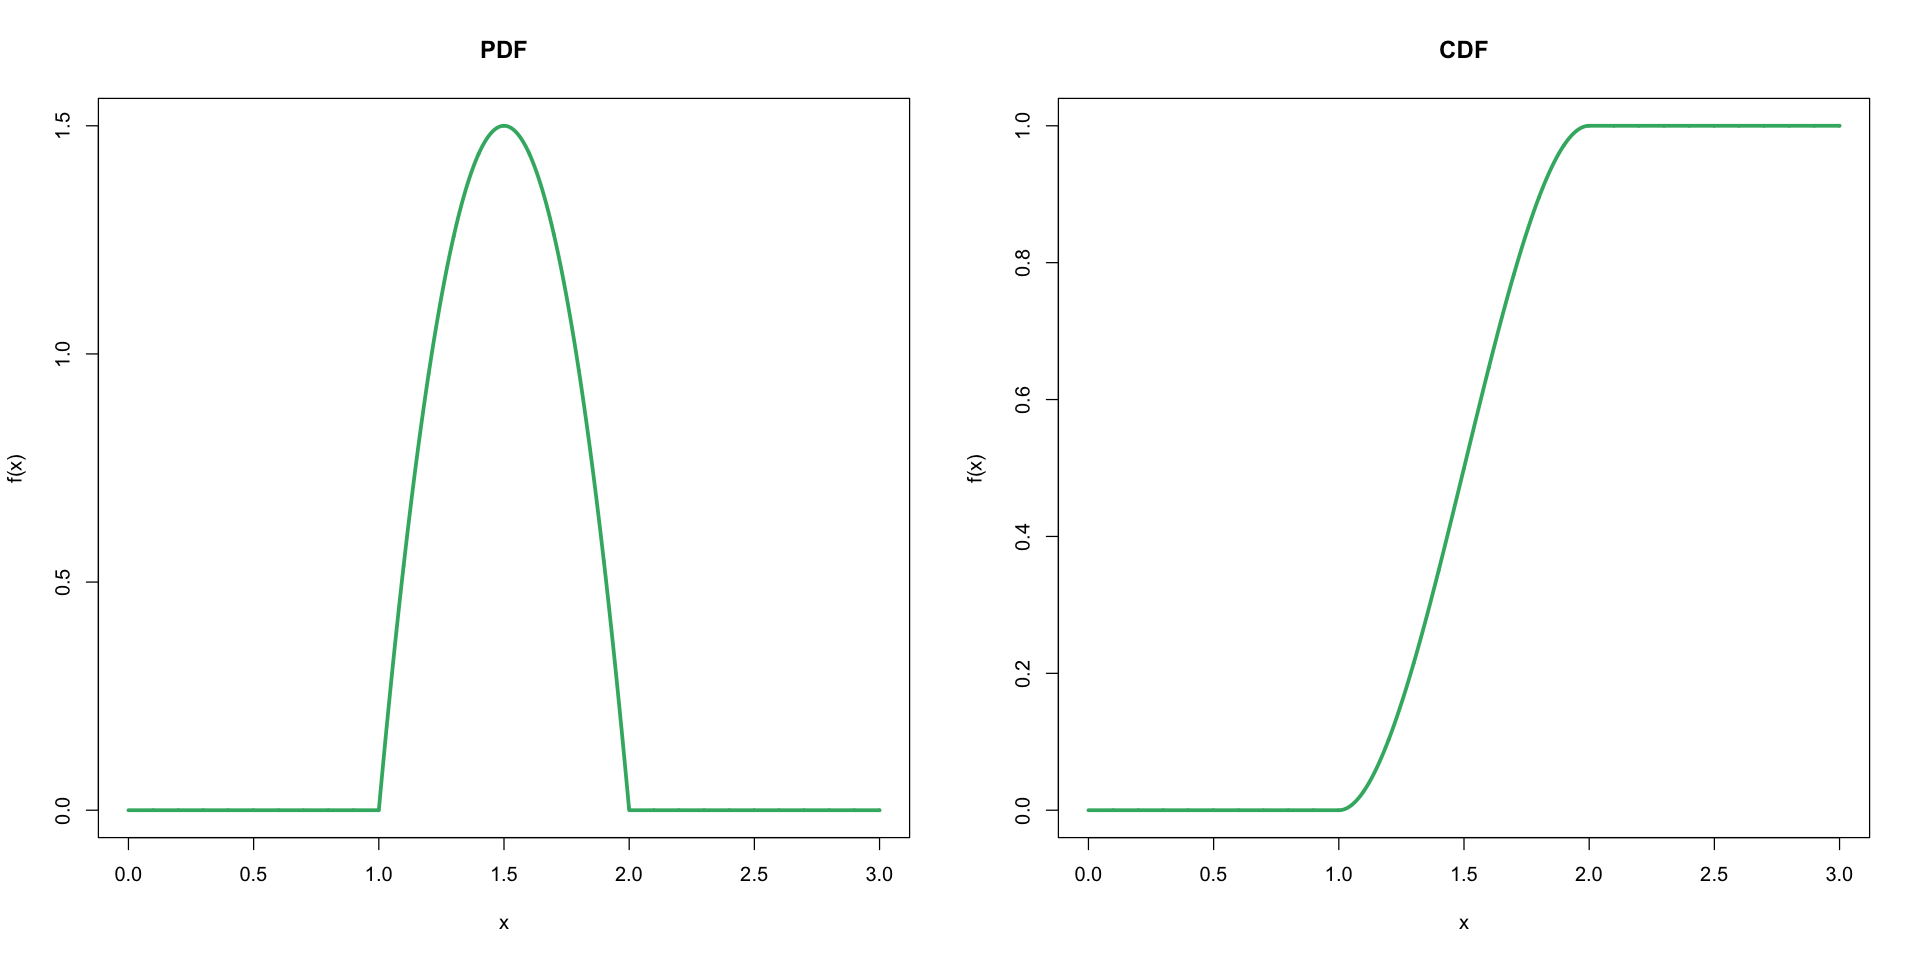

In [13]:
options(repr.plot.width = 16, repr.plot.height = 8)

par(mfrow=c(1,2))
x <- seq(0, 3, 0.001)
ap <- dtolc(x)
ad <- ptolc(x)
plot(x, ap, col='mediumseagreen', xlab="x", ylab="f(x)", type='l', lwd = 3, main = "PDF")
plot(x, ad, col='mediumseagreen', xlab="x", ylab="f(x)", type='l', lwd = 3, main = "CDF")

In [14]:
cat("The probability that the student will finish the aptitude test in 
    more than 75 minutes is:", 1-ptolc(75/60), "\n")
cat("The probability that the student will finish the aptitude test in 
    between 90 and 120 minutes is:", (ptolc(120/60)-ptolc(90/60)), "\n")

The probability that the student will finish the aptitude test in more than 75 minutes is: 0.84375 
The probability that the student will finish the aptitude test in between 90 and 120 minutes is: 0.5 


## Exercise 6

In [15]:
dlife <- function(x) {
    out <- ifelse(x<2 & x>1,
                  2/x^2,
                  0 )
    return(out)
}



plife <- function(x) {
    out <- ifelse(x<2 & x>1,
                  2 - 2/x,
                  ifelse(x<=1,
                         0.,
                         1.))
    return(out)
}


qlife <- function(p) {
    out <- ifelse(p<1 & p>0,
                  2/(2-p),
                  "p out of bounds")
    return(out)
}


rlife <- function(n) {
    return(qlife(runif(n)))
}

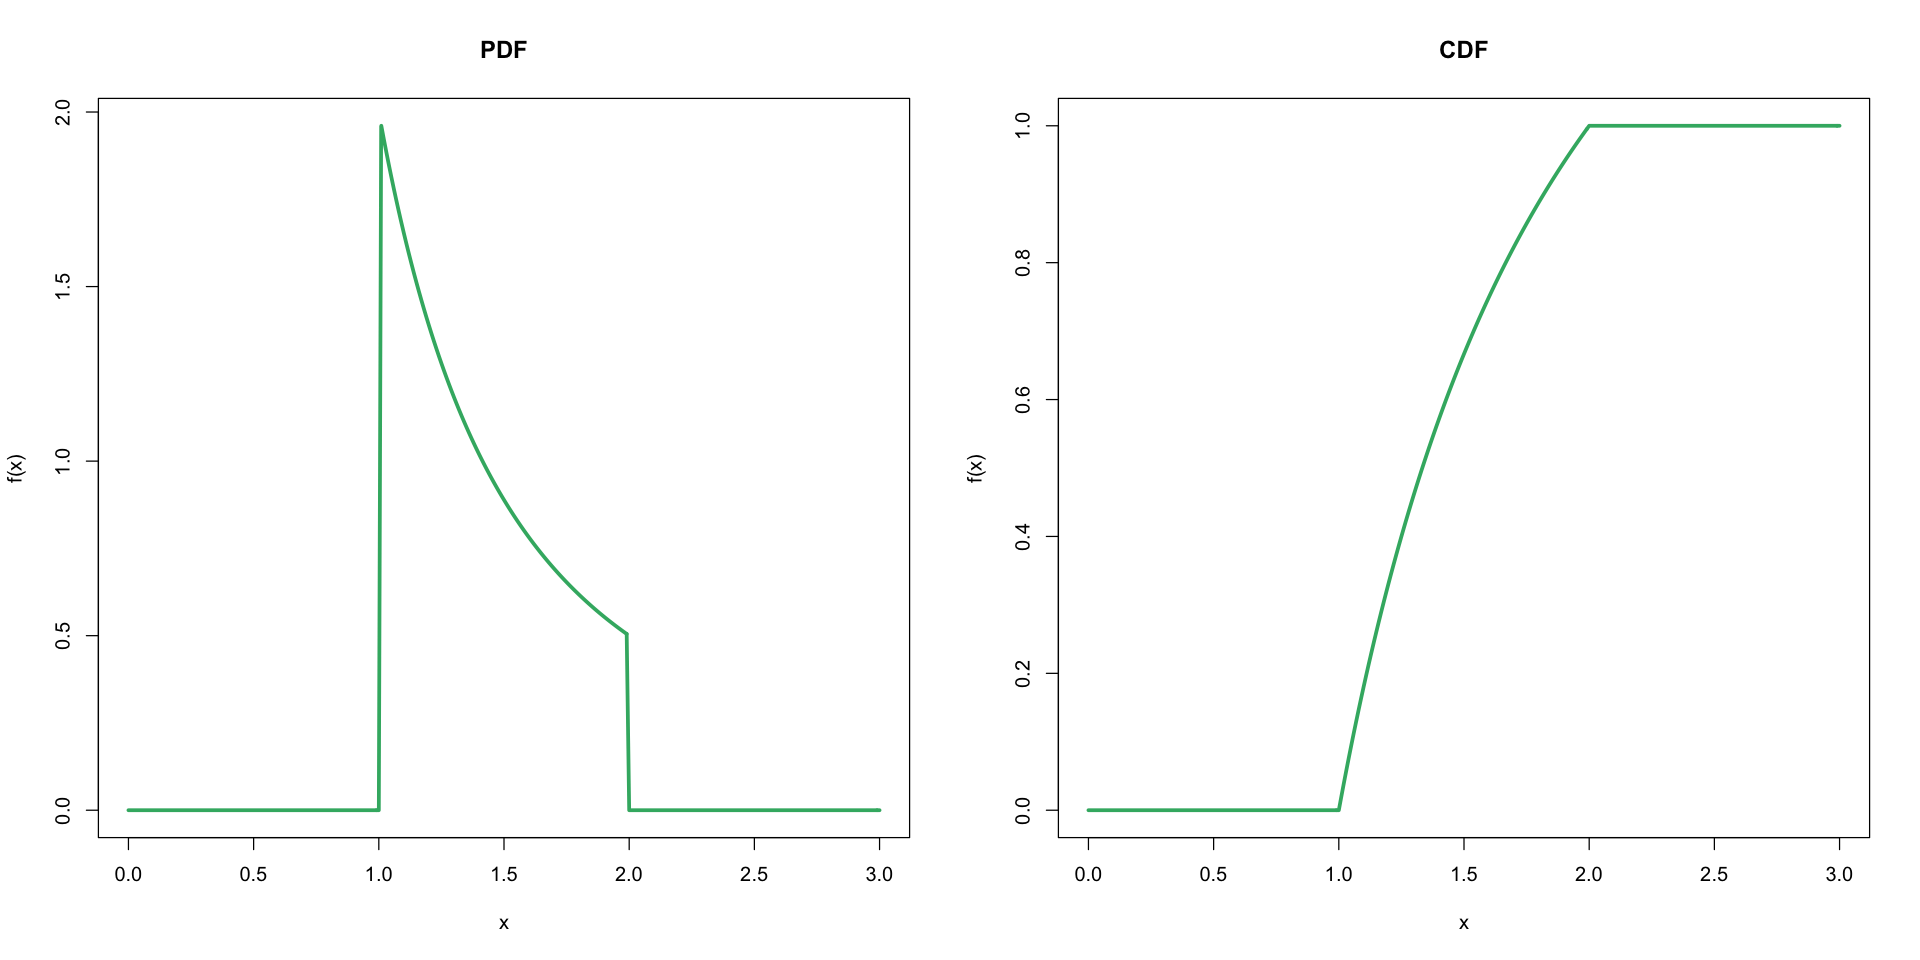

In [16]:
par(mfrow=c(1,2))
x <- seq(0, 3, 0.01)
ap <- dlife(x)
ad <- plife(x)

plot(x, ap, col='mediumseagreen', xlab="x", ylab="f(x)", type='l', lwd = 3, main = "PDF")
plot(x, ad, col='mediumseagreen', xlab="x", ylab="f(x)", type='l', lwd = 3, main = "CDF")

In [17]:
cat("The probability that the tires will last less than 15000 km is:", plife(1.5))

The probability that the tires will last less than 15000 km is: 0.6666667

In [18]:
s <- rlife(3000)

cat("The mean value is", mean(s)*10^4, "km\n")
cat("The variance is", mean((s*10^4)^2) - (mean(s*10^4)^2), "km^2")

The mean value is 13879.46 km
The variance is 7696526 km^2